# IS 603 Project Draft
Notebook created by Mary T. <br><br>
This project's objective is to utilize different models with machine learning to predict customer health insurance charges. The initial algorithm of interest is linear regression, however this notebook will test other methods and scope algorithm accuracy.<br><br>
The data used within this project is [Medical Cost Personal Datasets](http://https://www.kaggle.com/mirichoi0218/insurance) and was originally obtained from [GitHub](http://https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).<br><br>
Inspiration for this project came from the question: 'Can you accurately predict insurance costs?'

## Abstract
A new health insurance company is seeking a strategy to increase revenue, such as accruing more annual premiums or setting plan prices correctly to minimize loss. <br><br>
To do this, the company wants to identify the most at-risk customer groups and predict how much their average medical expenses will be. With this information, the insurance company will be able to properly price their plans in accordance to predicted medical charges. <br><br>
Poor pricing of plans or premiums will incur more loss to the insurance company and too much loss will cause the company to fail. For insurance, customers may utilize  too much of the benefits than the company can actually cover.

## Data Information
* **age**: insurance customer age in years
* **sex**: insurance customer gender: female, male
* **bwi**: body mass index
* **children**: # of children covered by health insurance or # of dependents
* **smoker**: smoking: yes, no
* **region**: the customer's residential area in the US: northeast, southeast, southwest, northwest
* **charges**: customer's medical costs billed by health insurance in dollars

## Importing Libraries
Here are the libraries utilized and needed for this notebook. 

In [205]:
# Libraries to be imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance/insurance.csv


## Exploratory Data Analysis (EDA)
Exploratory data analysis is used to grasp a general understanding of the orginal dataset, such as how many rows or columns there are, what the datatypes are, whether there are null values, and similar.

In [206]:
# definiing dataset variable and reading ine .csv file
df = pd.read_csv('../input/insurance/insurance.csv')

# previewing the first few rows of data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [207]:
# seeing number of rows, columns, null counts and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [208]:
# specifically seeing data types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [209]:
# summary statistics of the data and its numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [210]:
# seeing count of rows and columns
df.shape

(1338, 7)

In [211]:
# determining whether there is any missing/null/NA data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Encoding Categorical Variables
Currently, three columns (sex, smoker, and region) are non-numerical. This will affect the data analysis if ignored. To fix this, we will convert the object data types into categorical, and then use LabelEncoding to turn the categorical types into numerical.

In [212]:
# changing sex, smoker and region columns to numbers since they are object data type

# sex (female/male)
df['sex'] = df['sex'].astype('category')

# smoker(yes/no)
df['smoker'] = df['smoker'].astype('category')

# region
df['region'] = df['region'].astype('category')

In [213]:
# using LabelEncoder to turn categorical variables into numerical
le = LabelEncoder ()

# sex
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

# smoker
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

# region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

In [214]:
# checking data types once more
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [215]:
# seeing what the encoded variables will look like
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


We can now see that all the columns are numerical after encoding the variables. With the encoded variables the, here are the updated values for each column:
* **sex** column has 0 = female and 1 = male
* **smoker** column has 0 = no and 1 = yes
* **region** column has 1 = northwest, 2 = southeast, 3 = southwest, and 4 = northeast

## Visualizations
We will create visualizations with the encoded data.

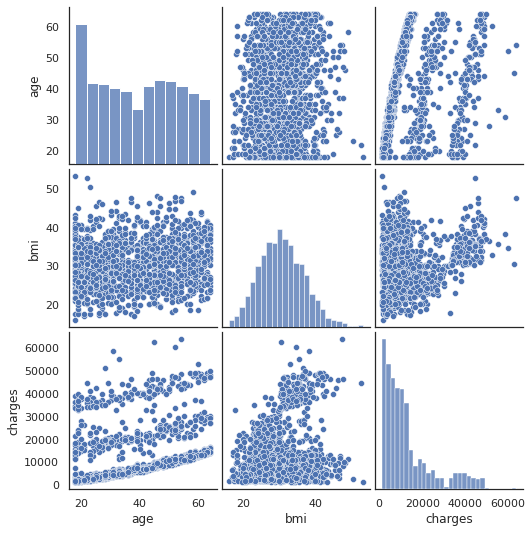

In [216]:
# visualizing a pairplot between age, bmi and charges
sns.pairplot(df[['age', 'bmi', 'charges']])

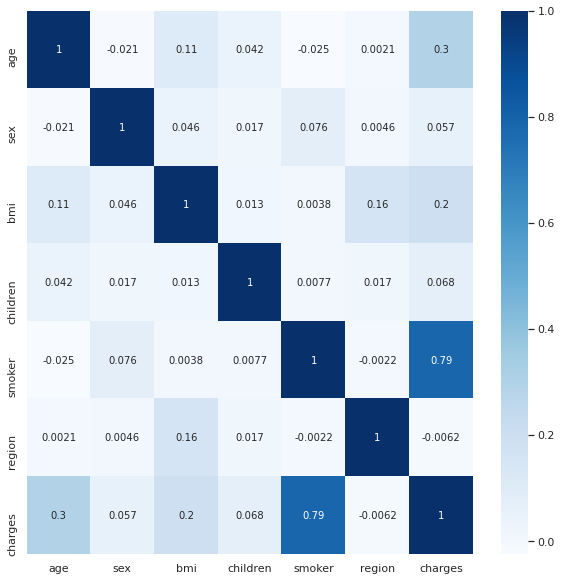

In [217]:
# creating correlation heatmap
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='Blues')

The variable with the highest correlation to charges is smoker, with a correlation of .79. The second most correlated variable is bmi with .16.

Text(0.5, 1.0, 'Distribution of Charges w/ Natural Log')

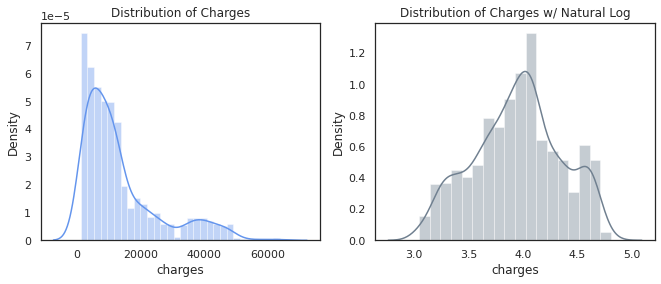

In [218]:
# seeing general distribution of charges
f = plt.figure(figsize = (11,4))
sns.set(style='white')

# without natural log
ax = f.add_subplot(121)
sns.distplot(df['charges'], kde = True, color = 'cornflowerblue', ax = ax)
ax.set_title('Distribution of Charges')

# with natural log
ax = f.add_subplot(122)
sns.distplot(np.log10(df['charges']), kde = True, color = 'slategray', ax = ax)
ax.set_title('Distribution of Charges w/ Natural Log')

The left graph does not look like a normal curve, so we will apply ln (natural log) to normalize the distribution, which is shown on the right.

Text(0.5, 1.0, 'Distribution of Charges for Smokers')

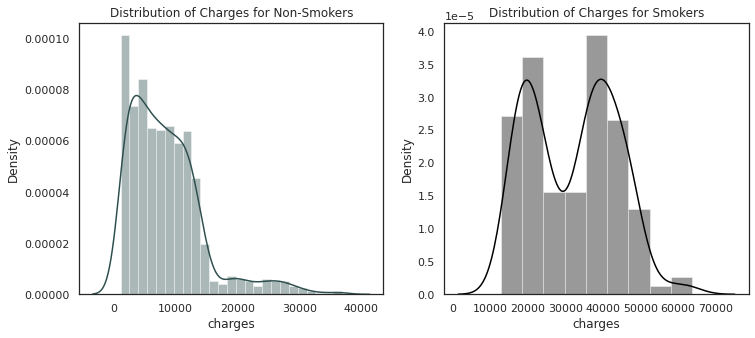

In [219]:
# seeing general distribution of charges for smokers and non-smokers
f = plt.figure(figsize = (12, 5))

# non smokers
ax = f.add_subplot(121)
sns.distplot(df[(df.smoker == 0)]['charges'], color = 'darkslategray', ax = ax)
ax.set_title('Distribution of Charges for Non-Smokers')

# smokers
ax = f.add_subplot(122)
sns.distplot(df[(df.smoker == 1)]['charges'], color = 'black', ax = ax)
ax.set_title('Distribution of Charges for Smokers')

The graph for smokers shows a prevalence of higher medical charges compared to non-smokers. The two peaks for smokers are at around 20,000-30,000 dollars and the peak for non-smokers is below 5,000 dollars. 

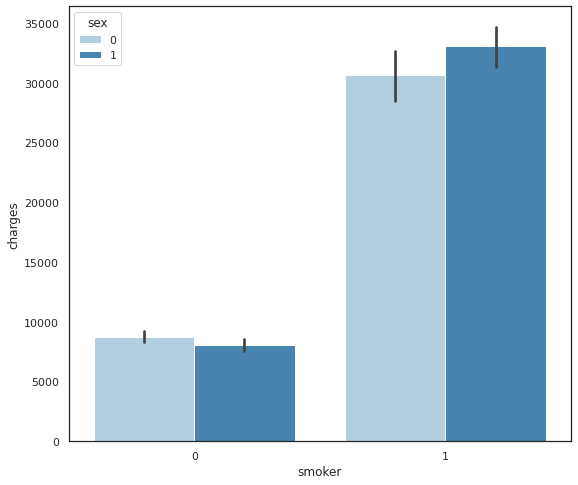

In [220]:
# bar plot to visualize smokers by sex for charges
f, ax = plt.subplots(1,1, figsize=(9,8))
ax = sns.barplot(x = 'smoker', y = 'charges',
                 hue='sex', data=df, palette='Blues')

According to this graph, there are more female non-smokers than males, and more male smokers than females. It is still prevalent that smokers have higher medical charges than the non-smokers.

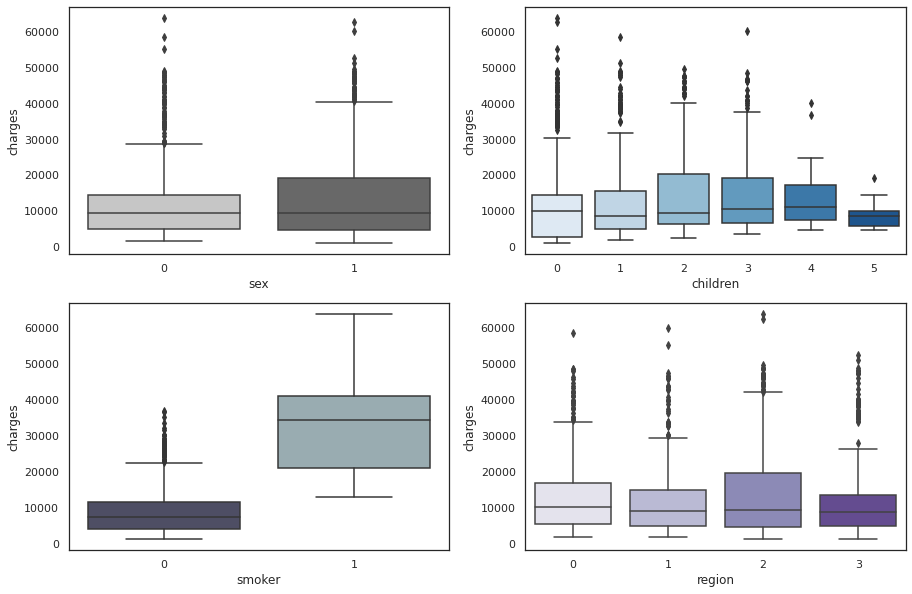

In [221]:
# boxplots to visualize different variables with charges
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'sex', y = 'charges', data = df, palette = 'Greys')
plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df, palette = 'Blues')
plt.subplot(2,2,3)
sns.boxplot(x = 'smoker', y = 'charges', data = df, palette = 'bone')
plt.subplot(2,2,4)
sns.boxplot(x = 'region', y = 'charges', data = df, palette = 'Purples')
plt.show()

From these boxplots, there is not much difference between the regions in terms of medical charges. It seems like people who do not have children have higher medical charges than those who do have children. As visualized, non-smokers have lower medical costs compared to smokers.

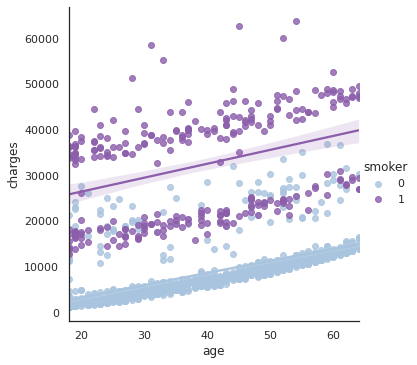

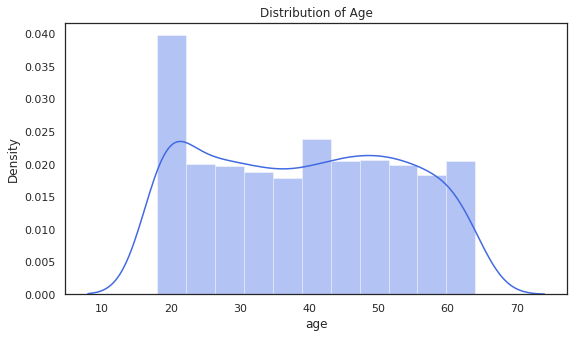

In [222]:
# seeing distribution with age and charges
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'BuPu')
plt.figure(figsize=(9,5))
plt.title('Distribution of Age')
ax = sns.distplot(df['age'], color = 'royalblue')

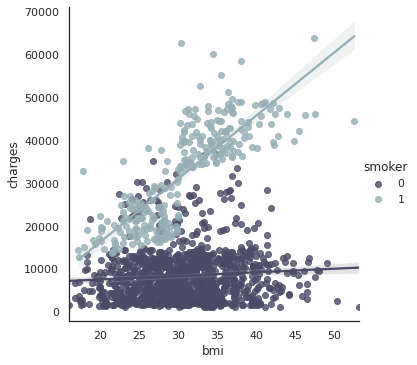

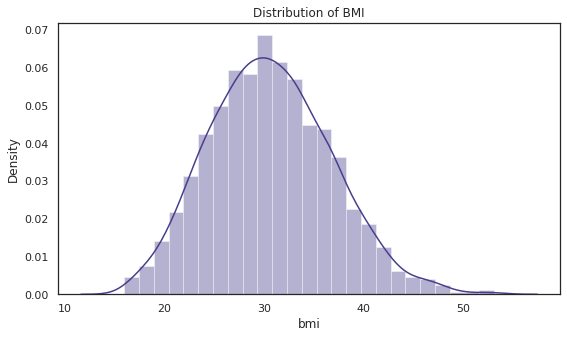

In [223]:
# seeing distribution with bmi and charges
ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'bone')
plt.figure(figsize = (9,5))
plt.title('Distribution of BMI')
ax = sns.distplot(df['bmi'], color = 'darkslateblue')

It appears that people with high bmi and who smoke have higher medical charges compared to those with lower bmi and who do not smoke.

Text(0.5, 1.0, 'Smokers and Non-smokers With Children')

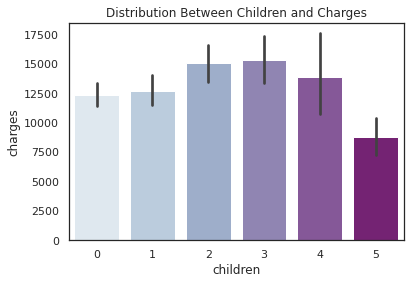

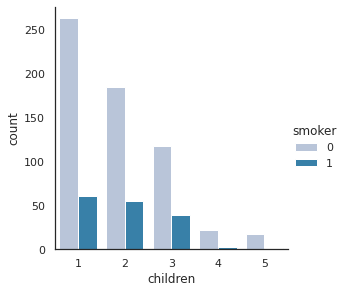

In [224]:
# seeing distribution with children and charges
plt.title('Distribution Between Children and Charges')
sns.barplot(x = df['children'], y = df['charges'], palette = 'BuPu')

# bar plot to visualize smokers by children for charges
sns.catplot(x = 'children', kind = 'count', palette = 'PuBu',hue = 'smoker',
            data = df[(df.children > 0)], size = 4)
ax.set_title('Smokers and Non-smokers With Children')

## Splitting Train/Test Data
Breaking the original data into training and testing sets is vital for machine learning. The training dataset is used to make predictions, whereas the testing dataset (the actual data) is used to compare the predictions. In this case, the training dataset will omit the 'charges' section from the original dataset since the goal of this analysis is to predict future medical charges.

In [225]:
# creating train and test data
x = df.drop(['charges'], axis = 1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)

## Random Forest
The random forest algorithm and feature importance will be used to identify which customer groups heavily impact medical charges.

In [226]:
# running the random forest reg algorithm
fr = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)
fr.fit(x_train,y_train)
fr_train_pred = fr.predict(x_train)
fr_test_pred = fr.predict(x_test)
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,fr_train_pred),
mean_squared_error(y_test,fr_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,fr_train_pred),
r2_score(y_test,fr_test_pred)))

MSE train data: 3628893.887, MSE test data: 19730453.910
R2 train data: 0.975, R2 test data: 0.876


In [227]:
# printing random forest result scores
y_train_pred = fr.predict(x_train)
y_test_pred = fr.predict(x_test)

print(fr.score(x_test,y_test))

0.8760104406351094


In [228]:
# Printing performance scores of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2643.7473409849
Mean Squared Error: 19730453.910072006
Root Mean Squared Error: 4441.897557359018


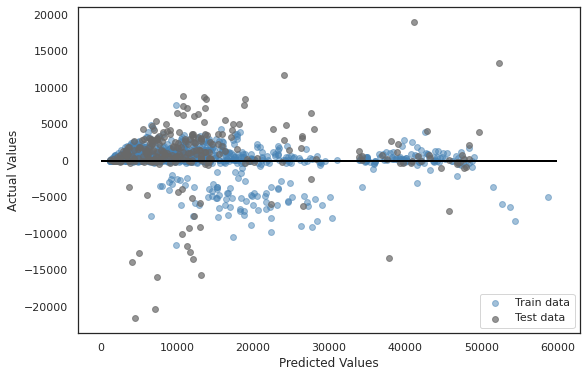

In [229]:
# visualizing predicted and actual values
plt.figure(figsize=(9,6))
plt.scatter(fr_train_pred,fr_train_pred - y_train, c = 'steelblue', marker = 'o', s = 35, alpha = 0.5, label = 'Train data')
plt.scatter(fr_test_pred,fr_test_pred - y_test, c = 'dimgrey', marker = 'o', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend(loc = 'lower right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'black')
plt.show()

In [230]:
# Printing list of features by importance
print('Ranking of Features by Importance\n')
important = fr.feature_importances_
std = np.std([tree.feature_importances_ for tree in fr.estimators_],axis=0)
indexes = np.argsort(important)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
important_list = []
for f in range(x.shape[1]):
    variable = variables[indexes[f]]
    important_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, important[indexes[f]]))

Ranking of Features by Importance

1.smoker(0.601678)
2.bmi(0.218831)
3.age(0.136943)
4.children(0.020990)
5.region(0.015165)
6.sex(0.006393)


<BarContainer object of 6 artists>

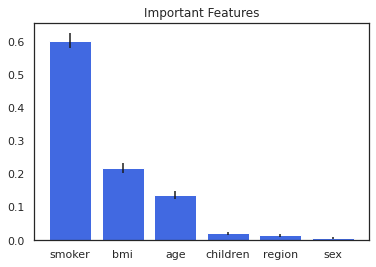

In [231]:
# visualizing the important features from algorithm
plt.figure()
plt.title("Important Features")
plt.bar(important_list, important[indexes],
       color = "royalblue", yerr = std[indexes], align = "center")

According to the feature importance results, smoker is the category that highly affects charges. After that is bmi, and then age.

In [232]:
# Predicting the medical charges with random forest
y_test_pred = fr.predict(x_test)

In [233]:
# Comparing actual recorded values with predicted values
dffr = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
dffr

,Actual,Predicted
578,9724.53000,12293.427745
610,8547.69130,10491.490482
569,45702.02235,44656.518494
1034,12950.07120,13224.902062
198,9644.25250,10241.280706
...,...,...
1084,15019.76005,16285.978402
726,6664.68595,6576.798158
1132,20709.02034,11569.256552
725,40932.42950,40888.070311


## Linear Regression

Because the goal of this analysis is to predict numeral values, linear regression will be used to calculate predicted medical charges. Linear regression is the initial algorithm proposed to use when creating this project. We will test if this is the best algorithm to use. Note that following this section is polynomial regression.

In [234]:
# running the linear reg algorithm
lr = LinearRegression().fit(x_train,y_train)

In [235]:
# printing result scores
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.799874714544996


A score of .7998 is not phenomenal. It seems like linear regression is not the best algorithm to use to predict medical charges.

In [236]:
# printing out intercept
print(lr.intercept_)

-11661.983908824413


In [237]:
# printing coefficients
print(lr.coef_)

[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


In [238]:
# Printing performance scores of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3930.3332739011403
Mean Squared Error: 31845929.134159427
Root Mean Squared Error: 5643.2197488809015


In [239]:
# Predicting the medical charges
y_test_pred = lr.predict(x_test)

In [240]:
# Comparing actual recorded values with predicted values
dflin = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
dflin

,Actual,Predicted
578,9724.53000,11017.230479
610,8547.69130,9787.530168
569,45702.02235,37994.782118
1034,12950.07120,16122.778407
198,9644.25250,6930.759230
...,...,...
1084,15019.76005,14699.098767
726,6664.68595,8210.854549
1132,20709.02034,16019.284542
725,40932.42950,33104.944084


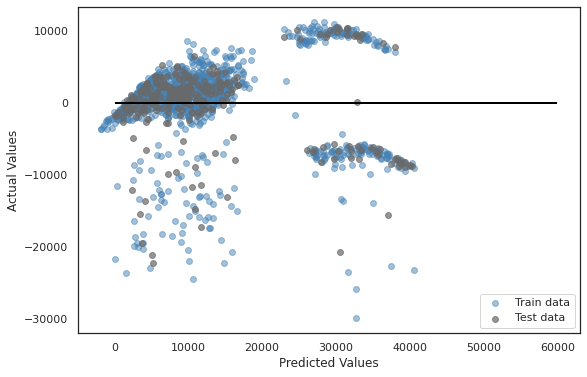

In [241]:
# visualizing predicted and actual values
plt.figure(figsize=(9,6))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'steelblue', marker = 'o', s = 35, alpha = 0.5, label = 'Train data')
plt.scatter(y_test_pred,y_test_pred - y_test, c = 'dimgrey', marker = 'o', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend(loc = 'lower right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'black')
plt.show()

## Polynomial Regression
If data points do not fit a linear regression precisely, it may be ideal to use polynomial regression.<br><br>

Polynomial regression also uses the relationship between variables x and y in order to identify the best way to draw a line through data points.

### Degree 2
We will first use the polynomial algorithm with degree 2.

In [242]:
# running polynomial regression algorithm with degree 2
pf = PolynomialFeatures (degree = 2)
xpf = pf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(xpf, y, test_size = 0.2, random_state = 0)
pfreg = LinearRegression()
pfreg.fit(x_train, y_train)

LinearRegression()

In [243]:
# printing intercept, coefficients for degree 2 poly. reg.
ytrain_pred = pfreg.predict(x_train)
ytest_pred = pfreg.predict(x_test)
print(pfreg.intercept_)
print(pfreg.coef_)

180276667602002.84
[-1.80276668e+14  1.65973235e+02 -7.75170956e+02  8.76965018e+02
  8.80654151e+02 -9.70407146e+03 -1.75792351e+02  1.69567457e+00
  4.93517103e+01 -2.31387381e+00  7.96690494e+00 -7.03517303e+01
  1.12849486e+01 -7.75170956e+02 -7.34018240e+01  3.81595702e+02
 -3.48718779e+02  6.28563827e+02 -1.08234407e+01  3.54800101e+01
  1.40983094e+03 -6.02667024e+01 -7.08395396e+02  1.22301682e+03
  1.74020933e+02 -9.70407146e+03  1.01053076e+03  1.70578346e+02]


In [244]:
# printing score for degree 2 poly. reg.
print(pfreg.score(x_test, y_test))

0.8648638353023694


A score of .8648 is better than the linear regression's score of .7998

In [245]:
# Printing performance scores of the algorithm for degree 2 poly. reg.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3930.3332739011403
Mean Squared Error: 31845929.134159427
Root Mean Squared Error: 5643.2197488809015


In [246]:
# Predicting the medical charges for degree 2 poly. reg.
y_test_pred = pfreg.predict(x_test)

In [247]:
# Comparing actual recorded values with predicted values for degree 2 poly. reg.
dfpreg = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
dfpreg

,Actual,Predicted
578,9724.53000,13421.62500
610,8547.69130,11232.84375
569,45702.02235,49560.25000
1034,12950.07120,13045.15625
198,9644.25250,9202.46875
...,...,...
1084,15019.76005,17067.71875
726,6664.68595,9634.53125
1132,20709.02034,12398.59375
725,40932.42950,45917.75000


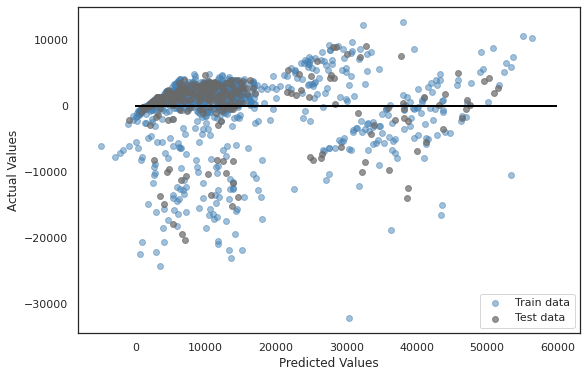

In [248]:
# visualizing predicted and actual values for poly reg. degree 2
plt.figure(figsize=(9,6))
plt.scatter(ytrain_pred, ytrain_pred - y_train, c = 'steelblue', marker = 'o', s = 35, alpha = 0.5, label = 'Train data')
plt.scatter(ytest_pred, ytest_pred - y_test, c = 'dimgrey', marker = 'o', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend(loc = 'lower right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'black')
plt.show()

Graphically, it seems like polynomial regression with degree 2 is more scattered compared to linear regression.

### Degree 3
Now let's try the algorithm with degree 3.

In [249]:
# running polynomial regression algorithm with degree 3
pf = PolynomialFeatures (degree = 3)
xpf = pf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(xpf, y, test_size = 0.2, random_state = 0)
pfreg = LinearRegression()
pfreg.fit(x_train, y_train)

LinearRegression()

In [250]:
# printing intercept, coefficients for degree 3 poly. reg.
ytrain_pred = pfreg.predict(x_train)
ytest_pred = pfreg.predict(x_test)
print(pfreg.intercept_)
print(pfreg.coef_)

-1981186640807.462
[ 1.98118667e+12 -1.35713148e+02 -2.70657813e+03 -2.79599146e+03
  4.32238096e+03 -1.08266880e+04 -1.77018613e+03  2.55102939e+00
  1.38901077e+02  5.89079191e+00 -1.97656225e+02  4.44999762e+01
  7.58329510e+01 -2.70657813e+03  8.37328245e+01 -9.22006840e+02
 -4.42876232e+02  6.59614907e+02  9.09450960e+01  1.32481827e+02
  9.74848593e+02 -3.94147748e+01 -7.33316398e+02  1.09404510e+03
 -6.07988927e+02 -1.08266880e+04 -1.77110340e+03  6.21856417e+01
  7.85438481e-03 -1.99179557e+00 -1.97549121e-04  1.40179730e+00
 -3.90195086e+00  2.10439114e-01  1.38901077e+02 -5.33926777e+00
  4.23565459e+01  1.52465406e+02  3.12060621e+00 -4.38008653e-02
  1.91514299e+00  7.75110347e+00 -2.34386831e+00 -3.95965520e+00
 -2.84320186e+01  1.55116290e+01  4.44999762e+01 -1.96716219e+01
 -2.05237382e+00 -2.70657813e+03  8.37328245e+01 -9.22006840e+02
 -4.42876232e+02  6.59614907e+02  2.17958514e+00 -4.58706986e+01
 -1.79543638e+02 -2.69020468e+00  2.64276310e+02 -7.94320120e+01
  7.76

In [251]:
# printing score for degree 3 poly. reg.
print(pfreg.score(x_test, y_test))

0.8740116043862739


A score of .8740 is better than the degree 2 polynomial regression score of .8648 and linear regression's score of .7998.

In [252]:
# printing performance scores of the algorithm for degree 3 poly. reg.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3089.882598615672
Mean Squared Error: 21504212.79669052
Root Mean Squared Error: 4637.263503046869


In [253]:
# predicting the medical charges for degree 3 poly. reg.
y_test_pred = pfreg.predict(x_test)

In [254]:
# comparing actual recorded values with predicted values for degree 3 poly. reg.
dfpreg2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
dfpreg2

,Actual,Predicted
578,9724.53000,12250.035889
610,8547.69130,10553.878174
569,45702.02235,47725.078125
1034,12950.07120,12720.501221
198,9644.25250,11270.635254
...,...,...
1084,15019.76005,17653.771484
726,6664.68595,8972.476562
1132,20709.02034,12448.957031
725,40932.42950,43410.416992


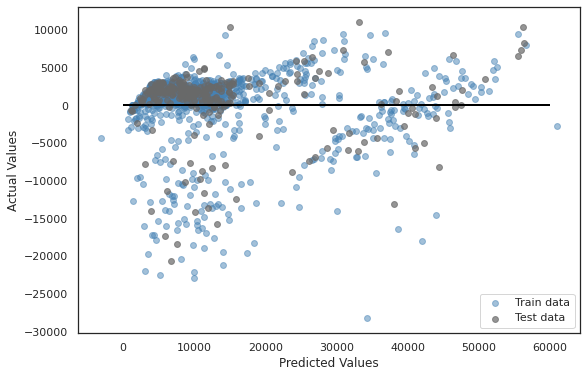

In [ ]:
# visualizing predicted and actual values for poly reg. degree 3
plt.figure(figsize=(9,6))
plt.scatter(ytrain_pred, ytrain_pred - y_train, c = 'steelblue', marker = 'o', s = 35, alpha = 0.5, label = 'Train data')
plt.scatter(ytest_pred, ytest_pred - y_test, c = 'dimgrey', marker = 'o', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend(loc = 'lower right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'black')
plt.show()

Similar to degree 2 polynomial regression graph, results seem more scattered compared to linear regression.